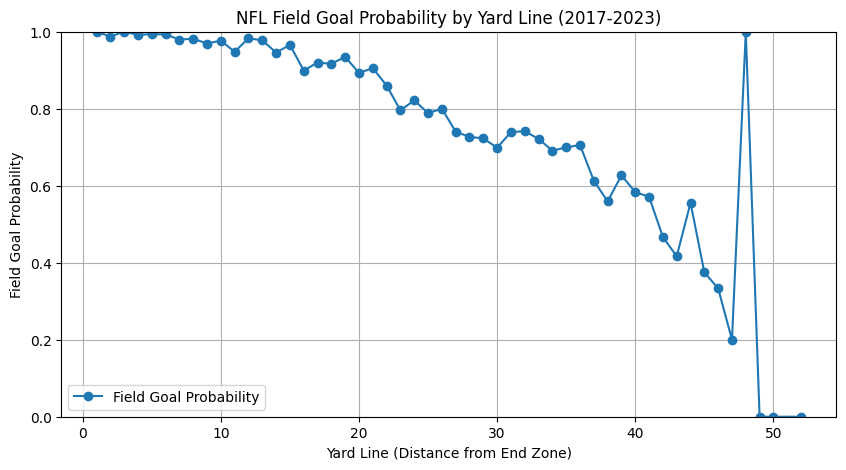

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file created in R
with open("field_goal_probabilities.json", "r") as file:
    fg_data = json.load(file)

# Convert JSON to Pandas DataFrame
df = pd.DataFrame(fg_data)

# Sort DataFrame by yardline for correct plotting
df = df.sort_values(by="yardline")

# Plot Field Goal Probability
plt.figure(figsize=(10, 5))
plt.plot(df["yardline"], df["fg_prob"], marker="o", linestyle="-", label="Field Goal Probability")

# Add labels and title
plt.xlabel("Yard Line (Distance from End Zone)")
plt.ylabel("Field Goal Probability")
plt.title("NFL Field Goal Probability by Yard Line (2017-2023)")
plt.ylim(0, 1)  # Probability range from 0 to 1
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


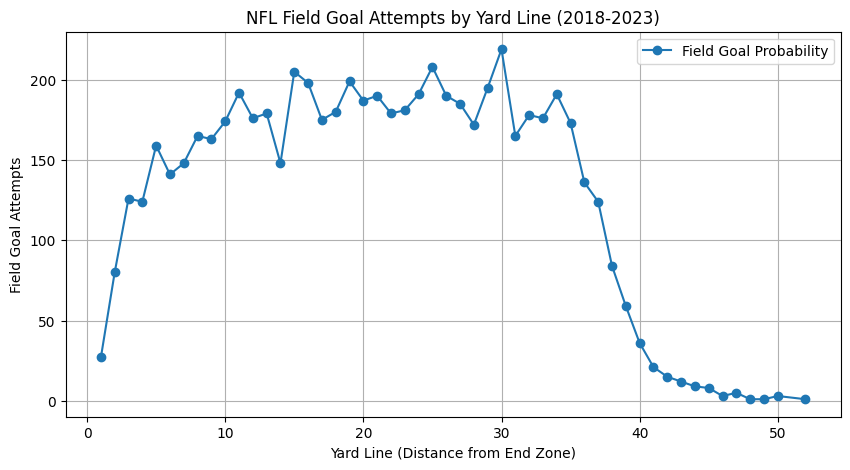

In [2]:
# Plot Field Goal Probability
plt.figure(figsize=(10, 5))
plt.plot(df["yardline"], df["attempts"], marker="o", linestyle="-", label="Field Goal Probability")

# Add labels and title
plt.xlabel("Yard Line (Distance from End Zone)")
plt.ylabel("Field Goal Attempts")
plt.title("NFL Field Goal Attempts by Yard Line (2018-2023)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

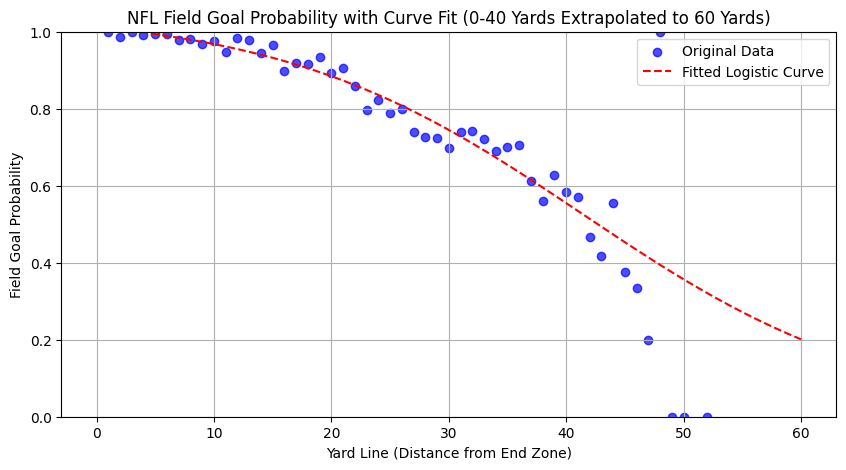

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the JSON file created in R
with open("field_goal_probabilities.json", "r") as file:
    fg_data = json.load(file)

# Convert JSON to Pandas DataFrame
df = pd.DataFrame(fg_data)

# Filter for yard lines in the range (0-40 yards)
df_fit = df[df["yardline"] <= 45].sort_values(by="yardline")

# Define a logistic function for curve fitting
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Fit a logistic curve to the data (0-40 yards)
popt, _ = curve_fit(logistic, df_fit["yardline"], df_fit["fg_prob"], p0=[1, 0.1, 20])

# Generate extrapolated values for a wider range (0-60 yards)
yardlines_extrapolated = np.linspace(0, 60, 100)
fg_prob_extrapolated = logistic(yardlines_extrapolated, *popt)

# Plot original data
plt.figure(figsize=(10, 5))
plt.scatter(df["yardline"], df["fg_prob"], color="blue", label="Original Data", alpha=0.7)

# Plot fitted logistic curve (0-40 yards) and extrapolated values
plt.plot(yardlines_extrapolated, fg_prob_extrapolated, color="red", linestyle="--", label="Fitted Logistic Curve")

# Add labels and title
plt.xlabel("Yard Line (Distance from End Zone)")
plt.ylabel("Field Goal Probability")
plt.title("NFL Field Goal Probability with Curve Fit (0-40 Yards Extrapolated to 60 Yards)")
plt.ylim(0, 1)  # Probability range from 0 to 1
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [4]:
import json
import pandas as pd

# Load the existing JSON data
with open("field_goal_probabilities_edited.json", "r") as file:
    fg_data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(fg_data)

# Create new data for yard lines 51-99 with fg_prob = 0
new_data = [{"yardline": y, "attempts": 0, "fg_prob": 0} for y in range(51, 100)]

# Convert to DataFrame and append to original data
df_extended = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Save the updated data back to JSON
df_extended = df_extended.sort_values(by="yardline")  # Ensure yardlines are in order
df_extended.to_json("field_goal_probabilities_edited.json", orient="records", indent=2)

# Print confirmation message
print("Extended dataset saved to 'field_goal_probabilities_edited.json'")


Extended dataset saved to 'field_goal_probabilities_edited.json'


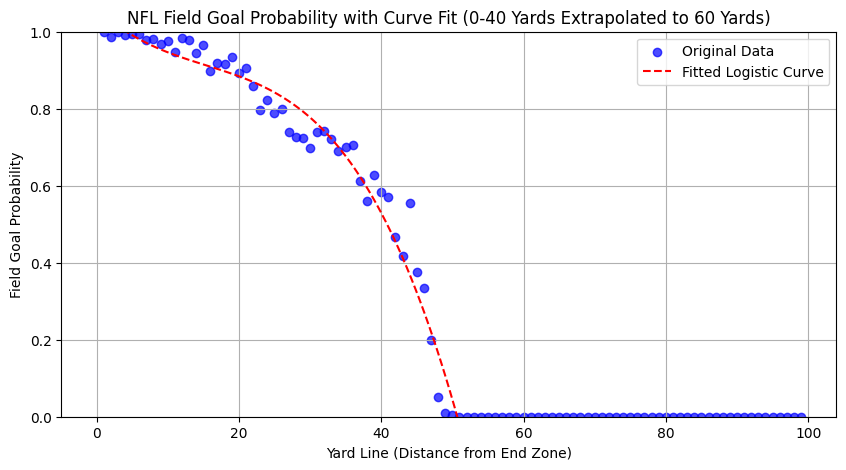

In [12]:
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(fg_data)

# Filter for yard lines in the range (0-40 yards)
df_fit = df[df["yardline"] <= 50].sort_values(by="yardline")

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit a cubic curve to the data (0-45 yards)
popt, _ = curve_fit(cubic, df_fit["yardline"], df_fit["fg_prob"])

# Generate extrapolated values for a wider range (0-60 yards)
yardlines_extrapolated = np.linspace(0, 60, 100)
fg_prob_extrapolated = cubic(yardlines_extrapolated, *popt)

# Plot original data
plt.figure(figsize=(10, 5))
plt.scatter(df["yardline"], df["fg_prob"], color="blue", label="Original Data", alpha=0.7)

# Plot fitted logistic curve (0-40 yards) and extrapolated values
plt.plot(yardlines_extrapolated, fg_prob_extrapolated, color="red", linestyle="--", label="Fitted Logistic Curve")

# Add labels and title
plt.xlabel("Yard Line (Distance from End Zone)")
plt.ylabel("Field Goal Probability")
plt.title("NFL Field Goal Probability with Curve Fit (0-40 Yards Extrapolated to 60 Yards)")
plt.ylim(0, 1)  # Probability range from 0 to 1
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### Extrapolated FG Probabilities

In [14]:
for i in range(40, 51):
    print(str(i) + ": " + str(cubic(i, *popt)))

40: 0.529710842451814
41: 0.49349652755815854
42: 0.454816861975166
43: 0.4135756969502167
44: 0.36967688373068996
45: 0.3230242735639659
46: 0.2735217176974245
47: 0.22107306737844523
48: 0.1655821738544081
49: 0.1069528883726929
50: 0.04508906218067943
